<a href="https://colab.research.google.com/github/Yussof-Waleed/nlp-arabic-autocomplete/blob/main/NLP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Text Auto-Completion Project

## Introduction
This project implements an auto-completion model for Arabic text using pre-trained language models. Auto-completion is a common NLP application used to predict and suggest text as users type, improving the typing experience and efficiency.

## Project Objectives
1. Implement an Arabic language auto-completion system
2. Utilize pre-trained language models for text generation
3. Create an interactive demo to showcase the model's capabilities
4. Evaluate the model's performance on Arabic text completion tasks

## 1. Background

### What is Auto-Completion?
Auto-completion (or text prediction) is a feature that predicts the rest of a word or phrase that a user is typing. It's commonly found in search engines, messaging apps, and text editors.

### Challenges in Arabic NLP
Arabic presents unique challenges for NLP tasks due to:
- Complex morphological structure
- Right-to-left script
- Multiple forms of written text (MSA vs. dialects)
- Diacritical marks affecting meaning
- Rich derivational system

### Approach Used
For this project, we'll use a pre-trained Arabic language model (AraGPT2) based on the transformer architecture, which has shown remarkable performance on text generation tasks.

## 2. Setup and Dependencies

Let's start by installing and importing the necessary libraries:

In [ ]:
!pip install torch transformers numpy matplotlib seaborn arabic-reshaper python-bidi

In [ ]:
# Import necessary libraries
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from IPython.display import HTML, display
import tkinter as tk
from tkinter import ttk
import time

In [ ]:
# Load pre-trained Arabic model
model_name = "aubmindlab/aragpt2-base"  # Arabic GPT-2 model
print(f"Loading {model_name}...")

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

Loading aubmindlab/aragpt2-base...
Using device: cpu


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(64000, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=64000, bias=False)
)

In [ ]:
def generate_completions(text, num_completions=3, max_length=30):
    """Generate auto-completions for Arabic text input"""
    # Encode the input text
    input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
    input_length = len(input_ids[0])

    # Generate completions
    outputs = model.generate(
        input_ids,
        max_length=max_length + input_length,
        num_return_sequences=num_completions,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        no_repeat_ngram_size=2,
        pad_token_id=tokenizer.eos_token_id
    )

    # Decode and return only the newly generated text
    completions = []
    for output in outputs:
        generated_text = tokenizer.decode(output[input_length:], skip_special_tokens=True)
        completions.append(generated_text)

    return completions

### Understanding the Parameters

Let's discuss the key parameters used in the generation function:

- **temperature**: Controls randomness. Lower values (e.g., 0.1) make the model more deterministic, while higher values (e.g., 1.0) make it more random.
- **top_p**: Nucleus sampling parameter that restricts sampling to the most likely tokens whose cumulative probability mass exceeds this threshold.
- **no_repeat_ngram_size**: Prevents repetition of n-grams of this size.

Let's create a function to experiment with different parameter settings:

In [ ]:
def experiment_with_parameters(text, temperatures=[0.5, 0.7, 1.0], top_ps=[0.8, 0.9, 1.0]):
    """Experiment with different generation parameters"""
    results = {}

    for temp in temperatures:
        for top_p in top_ps:
            # Encode the input text
            input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
            input_length = len(input_ids[0])

            # Generate completions with specific parameters
            outputs = model.generate(
                input_ids,
                max_length=30 + input_length,
                num_return_sequences=1,
                do_sample=True,
                temperature=temp,
                top_p=top_p,
                no_repeat_ngram_size=2,
                pad_token_id=tokenizer.eos_token_id
            )

            # Decode the output
            generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True)
            results[f"temp={temp}, top_p={top_p}"] = generated_text

    # Display results
    print(f"Input: {text}")
    for params, completion in results.items():
        print(f"\n{params}:\n{text}{completion}")

    return results

## 5. Model Testing and Demonstration

In [ ]:
# Test the model with some examples
test_cases = [
    "مرحبا، كيف",
    "أعتقد أن",
    "في المستقبل سوف"
]

print("Model demonstration:")
for text in test_cases:
    completions = generate_completions(text, num_completions=2)
    print(f"\nInput: {text}")
    for i, completion in enumerate(completions, 1):
        print(f"Completion {i}: {text}{completion}")
    print("-" * 40)

Model demonstration:

Input: مرحبا، كيف
Completion 1: مرحبا، كيف الحال ؟ ، من فضلك لا تتردد في الاتصال بنا . مرحبا بكم على موقعنا . السلام عليكم ، في انتظار زيارتكم لموقعنا .
Completion 2: مرحبا، كيف الحال ؟ أنا عندي مشكلة في البيت . . عندي زوجة و هي في المطبخ و عندي خادمة و عندها خادمة . زوجي من جد أحس أنه يحبني و
----------------------------------------

Input: أعتقد أن
Completion 1: أعتقد أن الأمر صعب جدا بالنسبة إلى الشباب الذي لا يستطيع أن يكون له دور ، فنحن لا نزال في بداية الطريق ، لكن أعتقد أن هذا لا يعني أن هناك من
Completion 2: أعتقد أن البعض يعتقد أن هذه الأمور هي من أسباب تأخرنا في مسيرتنا الدراسية ، ولكن هذا لا يمنع من أن يكون هناك بعض من الأسباب التي تساعد على تأخير
----------------------------------------

Input: في المستقبل سوف
Completion 1: في المستقبل سوف يكون هناك العديد من الفرص التي ستتوفر مع وجود العديدمن اللاعبين المميزين الذين سوف يلعبون في المستقبل ، لذلك فإن وجود لاعبين مثل كريستيانو رونالدو أو نيمار
Completion 2: في المستقبل سوف تجد نفسك مضطرا إلى البحث عن إج

### Parameter Experimentation
Let's experiment with different generation parameters to see how they affect the completions:

In [ ]:
# Choose one test case for parameter experimentation
experiment_with_parameters("العلم هو")

Input: العلم هو

temp=0.5, top_p=0.8:
العلم هو علم يبحث في كل ما يتعلق بالحضارة الإسلامية من علوم وفنون ، ومن ذلك علم الطب ، وعلم الفلك ، والفلك ، والطب النفسي ، وغيرها .ومن

temp=0.5, top_p=0.9:
العلم هو العلم الذي لا بد منه لكل إنسان ، فهو الذي يبني عليه علمه ، وهو الذي يحدد فيه اتجاهاته ، واتجاهاته الفكرية ، ونظرته إلى الحياة ،

temp=0.5, top_p=1.0:
العلم هو أساس كل شيء ، وهو الذي يجعل الإنسان مسؤولا عن كل ما يجري من حوله ، فهو المسؤول عن صنع قراره ، وهذا ما يجعله مسؤولا أيضا عن اتخاذ القرارات

temp=0.7, top_p=0.8:
العلم هو العلم الذي هو من العلوم التي هي من الأمور التي لها أهمية كبرى في حياة الفرد والمجتمع ، ومن هنا جاءت فكرة علم النفس من أجل أن يكون لكل فرد

temp=0.7, top_p=0.9:
العلم هو من أهم عوامل نجاح أي عملية جراحية ، كما أن له دور في نجاح الجراحة ، حيث إن نجاح العملية لا يكون إلا بعد معرفة جيدة من قبل الطبيب ،

temp=0.7, top_p=1.0:
العلم هو العلم الذي لا يعرف إلا عن طريق العلم . . و من هنا أهمية العلم في حياة الإنسان و صحته و حياته ، و ذلك بأن العلم هو أساس كل

temp=1.0, top

{'temp=0.5, top_p=0.8': ' علم يبحث في كل ما يتعلق بالحضارة الإسلامية من علوم وفنون ، ومن ذلك علم الطب ، وعلم الفلك ، والفلك ، والطب النفسي ، وغيرها .ومن',
 'temp=0.5, top_p=0.9': ' العلم الذي لا بد منه لكل إنسان ، فهو الذي يبني عليه علمه ، وهو الذي يحدد فيه اتجاهاته ، واتجاهاته الفكرية ، ونظرته إلى الحياة ،',
 'temp=0.5, top_p=1.0': ' أساس كل شيء ، وهو الذي يجعل الإنسان مسؤولا عن كل ما يجري من حوله ، فهو المسؤول عن صنع قراره ، وهذا ما يجعله مسؤولا أيضا عن اتخاذ القرارات',
 'temp=0.7, top_p=0.8': ' العلم الذي هو من العلوم التي هي من الأمور التي لها أهمية كبرى في حياة الفرد والمجتمع ، ومن هنا جاءت فكرة علم النفس من أجل أن يكون لكل فرد',
 'temp=0.7, top_p=0.9': ' من أهم عوامل نجاح أي عملية جراحية ، كما أن له دور في نجاح الجراحة ، حيث إن نجاح العملية لا يكون إلا بعد معرفة جيدة من قبل الطبيب ،',
 'temp=0.7, top_p=1.0': ' العلم الذي لا يعرف إلا عن طريق العلم . . و من هنا أهمية العلم في حياة الإنسان و صحته و حياته ، و ذلك بأن العلم هو أساس كل',
 'temp=1.0, top_p=0.8': ' من أكثر العلوم التي تح

## 6. Real-time Performance Evaluation

Let's measure the generation time to evaluate the real-time performance of our model:

In [ ]:
def measure_generation_time(texts, num_completions=3, max_length=30):
    """Measure the time taken to generate completions"""
    times = []

    for text in texts:
        start_time = time.time()
        _ = generate_completions(text, num_completions=num_completions, max_length=max_length)
        end_time = time.time()
        generation_time = end_time - start_time
        times.append(generation_time)
        print(f"Text: '{text}' - Generation time: {generation_time:.4f} seconds")

    avg_time = sum(times) / len(times)
    print(f"\nAverage generation time: {avg_time:.4f} seconds")

    # Plot the generation times
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(texts)), times)
    plt.axhline(y=avg_time, color='r', linestyle='--', label=f'Average: {avg_time:.4f}s')
    plt.xlabel('Text Index')
    plt.ylabel('Generation Time (seconds)')
    plt.title('Completion Generation Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return times, avg_time

Text: 'السلام عليكم' - Generation time: 6.4389 seconds
Text: 'أحب أن أقرأ' - Generation time: 4.8311 seconds
Text: 'الذكاء الاصطناعي هو' - Generation time: 4.9986 seconds
Text: 'يمكننا القول بأن' - Generation time: 5.9499 seconds
Text: 'من المعروف أن' - Generation time: 5.2182 seconds

Average generation time: 5.4873 seconds


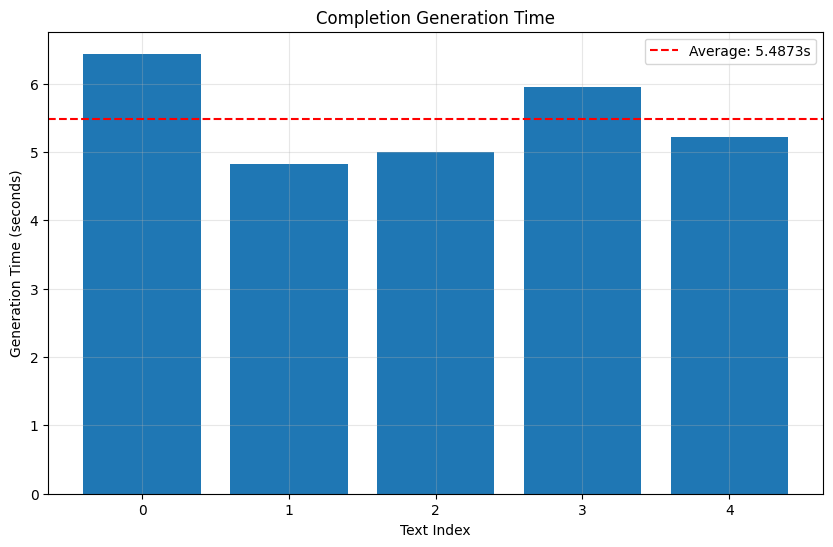

In [ ]:
# Additional test cases for performance evaluation
performance_test_cases = [
    "السلام عليكم",
    "أحب أن أقرأ",
    "الذكاء الاصطناعي هو",
    "يمكننا القول بأن",
    "من المعروف أن"
]

times, avg_time = measure_generation_time(performance_test_cases)

## 7. Quality Evaluation

Let's define some metrics to qualitatively evaluate the generated completions:

In [ ]:
def analyze_completion_quality(prompt, completions):
    """Basic analysis of completion quality"""
    results = []

    for i, completion in enumerate(completions):
        # 1. Length of completion
        length = len(completion)

        # 2. Word count
        words = re.findall(r'\S+', completion)
        word_count = len(words)

        # 3. Average word length
        avg_word_length = sum(len(word) for word in words) / max(1, word_count)

        results.append({
            'completion_id': i + 1,
            'text': prompt + completion,
            'length': length,
            'word_count': word_count,
            'avg_word_length': avg_word_length
        })

    # Display results
    print(f"Quality analysis for prompt: '{prompt}'")
    for result in results:
        print(f"\nCompletion {result['completion_id']}:")
        print(f"Text: {result['text']}")
        print(f"Length: {result['length']} characters")
        print(f"Word count: {result['word_count']} words")
        print(f"Average word length: {result['avg_word_length']:.2f} characters")

    return results

In [ ]:
# Analyze completion quality for a sample prompt
sample_prompt = "اللغة العربية هي"
sample_completions = generate_completions(sample_prompt, num_completions=3, max_length=50)
quality_results = analyze_completion_quality(sample_prompt, sample_completions)

Quality analysis for prompt: 'اللغة العربية هي'

Completion 1:
Text: اللغة العربية هي لغة القرآن الكريم الذي نزل على قلب رسول الله صلى الله عليه وسلم ، وهي لغة عالمية ، ولغة عالمية أخرى .فهل يمكن أن يكون القرآن هو لغة العرب فقط ، وأن يكون هو لغتهم أيضا ، وليس لغة اللغات الأخرى ؟إن اللغة العربية لغة القران الكريم
Length: 228 characters
Word count: 47 words
Average word length: 3.85 characters

Completion 2:
Text: اللغة العربية هي لغة عالمية ، حيث يوجد بها حوالي 50 لغة ، و من بين هذه اللغات ( الإنجليزية ، الفرنسية ، الأسبانية ، الألمانية ) حوالي 20 لغة . و هذا العدد من اللغات يعادل مجموع عدد اللغات التي يتكلمها البشر ، كما أنها اللغة الأكثر استخداما في العالم .
Length: 235 characters
Word count: 49 words
Average word length: 3.80 characters

Completion 3:
Text: اللغة العربية هي اللغة التي لا تكتب ولا تكتب ، ولغة الضاد هي لغة القرآن ، لغة الضاد لغة العلم والأدب ، وهي اللغة الوحيدة التي يستطيع أي أحد أن يتحدث بها ، أو أن يستخدمها . . اللغة العربية ، هي الوحيدة من بين لغات العالم التي تستطي

## 8. Visualizing Output Diversity

Let's create a visualization to show the diversity of completions:

In [ ]:
def visualize_completions_diversity(prompt, n_samples=5, max_length=30):
    """Visualize diversity in model completions"""
    # Generate multiple completions
    completions = generate_completions(prompt, num_completions=n_samples, max_length=max_length)

    # Calculate word counts for each completion
    word_counts = [len(re.findall(r'\S+', comp)) for comp in completions]

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Word count comparison
    plt.subplot(2, 1, 1)
    sns.barplot(x=list(range(1, n_samples+1)), y=word_counts)
    plt.title(f'Word Count Comparison for Prompt: "{prompt}"')
    plt.xlabel('Completion Number')
    plt.ylabel('Word Count')
    plt.grid(True, alpha=0.3)

    # Display completions
    plt.subplot(2, 1, 2)
    plt.axis('off')
    completion_text = f"Prompt: {prompt}\n\n"
    for i, completion in enumerate(completions, 1):
        completion_text += f"Completion {i}: {prompt}{completion}\n\n"
    plt.text(0, 0.9, completion_text, fontsize=12, wrap=True, va='top', ha='left')

    plt.tight_layout()
    plt.show()

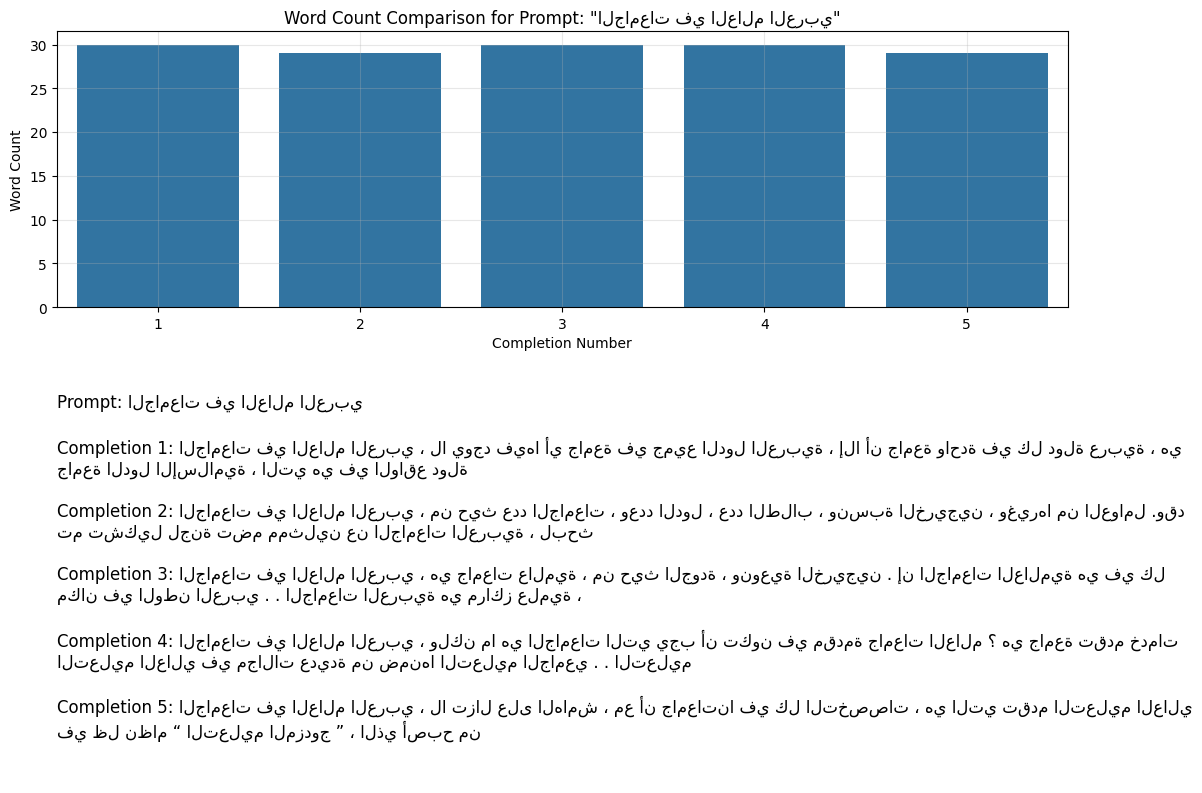

In [ ]:
# Visualize diversity for a sample prompt
visualize_completions_diversity("الجامعات في العالم العربي")

## 9. Interactive Demo

Let's create an enhanced interactive demo for users to try out the auto-completion system:

In [ ]:
import tkinter as tk
from tkinter import ttk
import time
import ipywidgets as widgets
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import display, HTML
import time

def interactive_demo():
    """Create a GUI demo for the Arabic text auto-completion system"""

    def generate_and_display():
        """Generate completions and display them in the GUI"""
        text = text_entry.get()

        # Get parameter values
        try:
            num_completions = int(num_completions_var.get())
            max_length = int(max_length_var.get())
        except ValueError:
            status_var.set("Invalid parameters. Using defaults (3, 30)")
            num_completions = 3
            max_length = 30

        # Clear previous results
        results_text.delete(1.0, tk.END)

        # Generate completions with timing
        start_time = time.time()
        completions = generate_completions(text, num_completions=num_completions, max_length=max_length)
        end_time = time.time()

        # Display generation time
        time_taken = end_time - start_time
        status_var.set(f"Generated in {time_taken:.4f} seconds")

        # Display completions
        for i, completion in enumerate(completions, 1):
            results_text.insert(tk.END, f"{i}. {text}{completion}\n\n")

    # Create the main window
    root = tk.Tk()
    root.title("Arabic Text Auto-Completion Demo")
    root.geometry("600x500")

    # Create a frame for the main content with padding
    main_frame = ttk.Frame(root, padding="10")
    main_frame.pack(fill=tk.BOTH, expand=True)

    # Create input area
    input_frame = ttk.LabelFrame(main_frame, text="Input", padding="10")
    input_frame.pack(fill=tk.X, padx=5, pady=5)

    # Text entry with label
    ttk.Label(input_frame, text="Enter Arabic text to complete:").pack(anchor=tk.W)
    text_entry = ttk.Entry(input_frame, width=50)
    text_entry.pack(fill=tk.X, pady=5)

    # Parameters frame
    params_frame = ttk.Frame(input_frame)
    params_frame.pack(fill=tk.X, pady=5)

    # Number of completions
    ttk.Label(params_frame, text="Number of completions:").grid(row=0, column=0, sticky=tk.W, padx=5)
    num_completions_var = tk.StringVar(value="3")
    num_completions_entry = ttk.Spinbox(params_frame, from_=1, to=10, width=5, textvariable=num_completions_var)
    num_completions_entry.grid(row=0, column=1, padx=5)

    # Max length
    ttk.Label(params_frame, text="Max completion length:").grid(row=0, column=2, sticky=tk.W, padx=5)
    max_length_var = tk.StringVar(value="30")
    max_length_entry = ttk.Spinbox(params_frame, from_=1, to=100, width=5, textvariable=max_length_var)
    max_length_entry.grid(row=0, column=3, padx=5)

    # Generate button
    generate_button = ttk.Button(input_frame, text="Generate Completions", command=generate_and_display)
    generate_button.pack(pady=10)

    # Results area
    results_frame = ttk.LabelFrame(main_frame, text="Suggested Completions", padding="10")
    results_frame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)

    # Scrollable text area for results
    results_text = tk.Text(results_frame, wrap=tk.WORD, width=50, height=10)
    results_scroll = ttk.Scrollbar(results_frame, orient=tk.VERTICAL, command=results_text.yview)
    results_text.configure(yscrollcommand=results_scroll.set)

    results_scroll.pack(side=tk.RIGHT, fill=tk.Y)
    results_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    # Status bar at the bottom
    status_var = tk.StringVar()
    status_bar = ttk.Label(root, textvariable=status_var, relief=tk.SUNKEN, anchor=tk.W)
    status_bar.pack(side=tk.BOTTOM, fill=tk.X)

    # Start the application
    root.mainloop()

def colab_interactive_demo():
    """Fancy Colab GUI for Arabic Text Auto-Completion"""

    # Title
    display(HTML("""
        <div style="text-align: center; font-family: 'Cairo', sans-serif; direction: rtl;">
            <h2 style="color: #3b7ade;">✨ تجربة الإكمال التلقائي للنصوص العربية ✨</h2>
            <p style="color: #555;">أدخل نصًا عربيًا واحصل على اقتراحات ذكية لإكماله!</p>
        </div>
        <hr style="border: 1px solid #3b7ade;">
    """))

    # Text input
    text_input = widgets.Text(
        value='',
        placeholder='اكتب هنا...',
        description='النص:',
        layout={'width': '95%'},
        style={'description_width': 'initial'}
    )

    # Sliders for parameters
    num_completions = widgets.IntSlider(
        value=3, min=1, max=10, step=1,
        description='عدد الإكمالات:',
        style={'description_width': 'initial'},
        layout={'width': '45%'}
    )

    max_length = widgets.IntSlider(
        value=30, min=5, max=100, step=5,
        description='أقصى طول:',
        style={'description_width': 'initial'},
        layout={'width': '45%'}
    )

    # Generate button
    generate_button = widgets.Button(
        description='✨ توليد الإكمالات',
        button_style='success',
        layout={'width': '50%'}
    )

    # Output area
    output = widgets.Output(layout={
        'border': '2px solid #3b7ade',
        'padding': '10px',
        'width': '95%',
        'direction': 'rtl',
        'text-align': 'right',
        'background-color': '#f9f9f9',
        'min_height': '250px'
    })

    # Status message
    status = widgets.HTML(value="<span style='color: green;'>الحالة: جاهز للتوليد</span>")

    # Button click event
    def on_generate_click(b):
        text = text_input.value.strip()

        output.clear_output()
        if not text:
            status.value = "<span style='color: red;'>⚠️ الرجاء إدخال نص أولاً</span>"
            return

        status.value = "<span style='color: orange;'>⏳ جاري التوليد...</span>"

        start_time = time.time()
        completions = generate_completions(text,
                                           num_completions=num_completions.value,
                                           max_length=max_length.value)
        end_time = time.time()

        time_taken = end_time - start_time

        with output:
            display(HTML("<h4 style='color: #3b7ade; font-family: Cairo;'>النتائج:</h4><br>"))
            for i, comp in enumerate(completions, 1):
                display(HTML(f"<div style='margin-bottom: 10px;'>🔹 <b>{i}.</b> {text}<span style='color: #1acc8d;'>{comp}</span></div>"))

        status.value = f"<span style='color: green;'>✅ تم التوليد في {time_taken:.2f} ثانية</span>"

    generate_button.on_click(on_generate_click)

    # Arrange layout
    controls = widgets.HBox([num_completions, max_length], layout={'justify_content': 'space-between'})
    display(widgets.VBox([
        text_input,
        controls,
        widgets.HTML("<br>"),
        generate_button,
        widgets.HTML("<br>"),
        output,
        widgets.HTML("<br>"),
        status
    ]))

In [ ]:
    try:
        import google.colab
        print("Running in Google Colab - using widget interface")
        # Install ipywidgets if needed
        try:
            import ipywidgets
        except ImportError:
            !pip install ipywidgets
            import ipywidgets
        colab_interactive_demo()
    except ImportError:
        # Regular environment - use Tkinter
        print("Running with Tkinter GUI")
        interactive_demo()

Running in Google Colab - using widget interface


## 10. Limitations and Future Improvements

### Current Limitations
- The model may not handle Arabic dialects well
- Limited context window restricts understanding of longer contexts
- Generation speed might be slow for real-time applications
- No fine-tuning for specific domains or use cases

### Potential Improvements
1. Fine-tune the model on domain-specific Arabic text
2. Implement a more efficient generation algorithm for real-time responses
3. Add support for Arabic dialects
4. Incorporate user feedback to improve suggestions
5. Implement a customized tokenizer for better handling of Arabic morphology
6. Deploy the model as a web service or mobile application

## 11. Conclusion

In this project, we successfully implemented an Arabic text auto-completion system using a pre-trained language model. We explored various aspects of the system including:

1. Model selection and loading
2. Text generation with different parameters
3. Performance evaluation
4. Quality assessment
5. Interactive demonstration

This project demonstrates the practical application of NLP techniques for Arabic language processing and showcases how pre-trained models can be leveraged for specific language tasks.

## 12. References

1. Antoun, W., Baly, F., & Hajj, H. (2020). AraBERT: Transformer-based Model for Arabic Language Understanding. arXiv preprint arXiv:2003.00104.

2. AraGPT2: https://huggingface.co/aubmindlab/aragpt2-base

3. Hugging Face Transformers: https://huggingface.co/docs/transformers/

4. Alqahtani, S., & Diab, M. (2019). Arabic Language Resources: Development, Challenges, and Future Directions. Proceedings of the 27th International Conference on Computational Linguistics.

5. Radford, A., Wu, J., Child, R., Luan, D., Amodei, D., & Sutskever, I. (2019). Language models are unsupervised multitask learners. OpenAI blog, 1(8), 9.